In [1]:
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
#importing data set of exogenous variables. We will convert the data to stationary form and drop columns with multicollinearity
inputs = pd.read_csv('Files/dataset_updated.csv')

In [4]:
inputs.head()

,Date,ICO composite indicator,Colombian Milds,Other Milds,Brazilian Naturals,Robustas,Target,Rainfall - (MM),Bond _Value,Tea_Price,Starbucks
0,1992-06-01,48.13,64.10,59.09,49.08,37.17,11.820455,194.595,7.261818,76.1880,0.347656
1,1992-07-01,48.70,62.50,58.20,48.53,39.19,11.572727,249.382,6.844545,79.8160,0.399325
2,1992-08-01,45.89,56.49,52.93,46.40,38.85,11.558929,217.829,6.585714,81.6300,0.399833
3,1992-09-01,47.11,56.18,53.23,49.43,40.98,11.623810,231.187,6.415238,87.0720,0.467262
4,1992-10-01,52.88,64.77,61.57,59.64,44.19,11.301705,126.710,6.585909,85.7115,0.470792


In [5]:
#Process of converting to Stationary series for the variable which will be included in the model

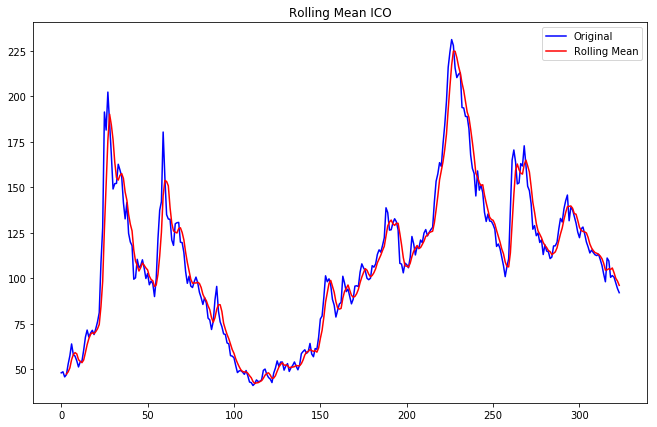

In [6]:
rolmean = inputs['ICO composite indicator'].rolling(window = 4).mean()
fig = plt.figure(figsize=(11,7))
orig = plt.plot(inputs['ICO composite indicator'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean ICO')
plt.show(block=False)

In [7]:
ICO_minus_rolmean = inputs['ICO composite indicator'] - rolmean
ICO_minus_rolmean.head(5)

0       NaN
1       NaN
2       NaN
3   -0.3475
4    4.2350
Name: ICO composite indicator, dtype: float64

In [8]:
len(inputs)

324

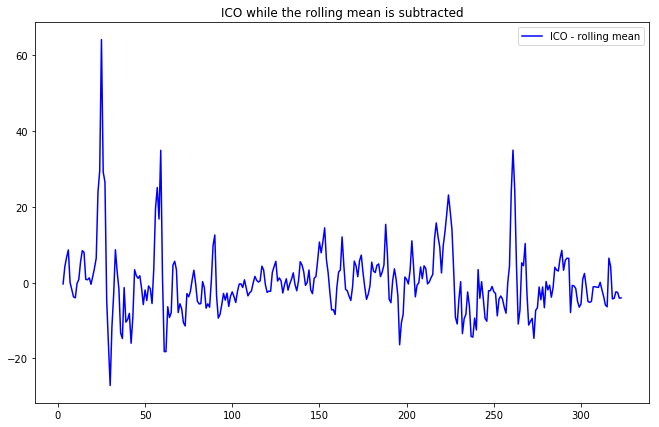

In [9]:
fig = plt.figure(figsize=(11,7))
plt.plot(ICO_minus_rolmean, color='blue',label='ICO - rolling mean')
plt.legend(loc='best')
plt.title('ICO while the rolling mean is subtracted')
plt.show(block=False)

In [10]:
len(ICO_minus_rolmean)

324

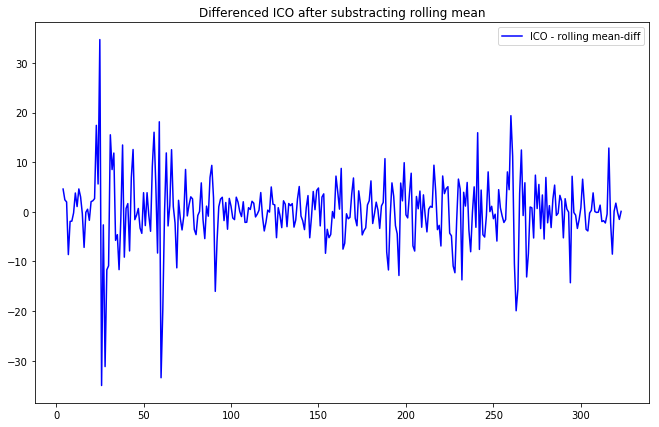

In [11]:
ICO_diff = ICO_minus_rolmean.diff(periods=1)
ICO_diff.head(10)

fig = plt.figure(figsize=(11,7))
plt.plot(ICO_diff, color='blue',label='ICO - rolling mean-diff')
plt.legend(loc='best')
plt.title('Differenced ICO after substracting rolling mean')
plt.show(block=False)

In [12]:
inputs['ICO_stationary']  = ICO_diff.values

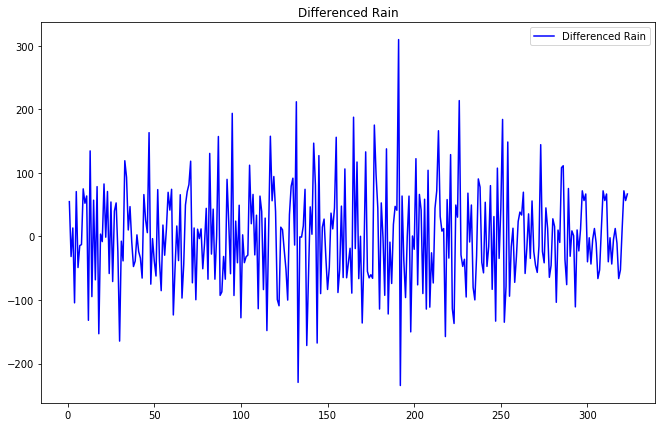

In [13]:
rain_diff = inputs['Rainfall - (MM)'].diff(periods=1)
fig = plt.figure(figsize=(11,7))
plt.plot(rain_diff, color='blue',label='Differenced Rain')
plt.legend(loc='best')
plt.title('Differenced Rain')
plt.show(block=False)

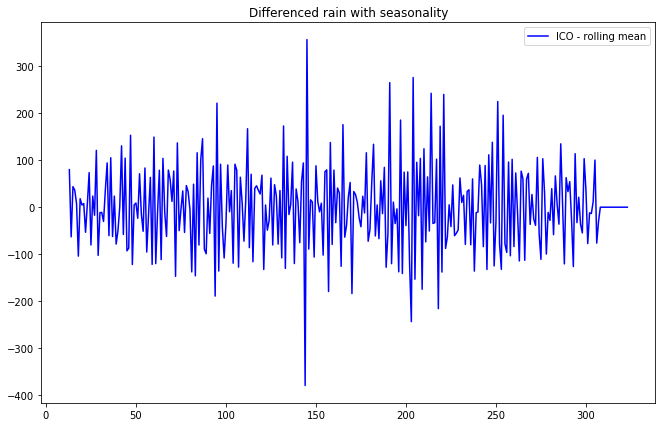

In [14]:
rain_diff_with_seasonality = rain_diff.diff(periods=12)


fig = plt.figure(figsize=(11,7))
plt.plot(rain_diff_with_seasonality, color='blue',label='ICO - rolling mean')
plt.legend(loc='best')
plt.title('Differenced rain with seasonality')
plt.show(block=False)

In [15]:
len(rain_diff_with_seasonality)

324

In [16]:
inputs['rain_stationary'] = rain_diff_with_seasonality.values

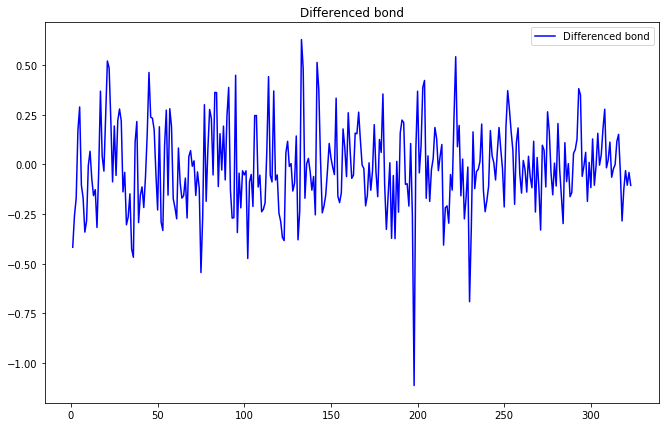

In [17]:
bond_diff = inputs['Bond _Value'].diff(periods=1)

fig = plt.figure(figsize=(11,7))
plt.plot(bond_diff, color='blue',label='Differenced bond')
plt.legend(loc='best')
plt.title('Differenced bond')
plt.show(block=False)

In [18]:
inputs['Bond_stationary'] = bond_diff.values

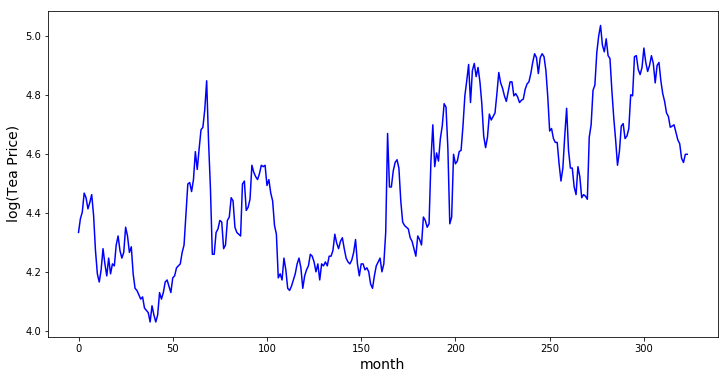

In [19]:
Tea_data = pd.Series(np.log(inputs['Tea_Price']))
fig = plt.figure(figsize=(12,6))
plt.plot(Tea_data, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(Tea Price)", fontsize=14)
plt.show()

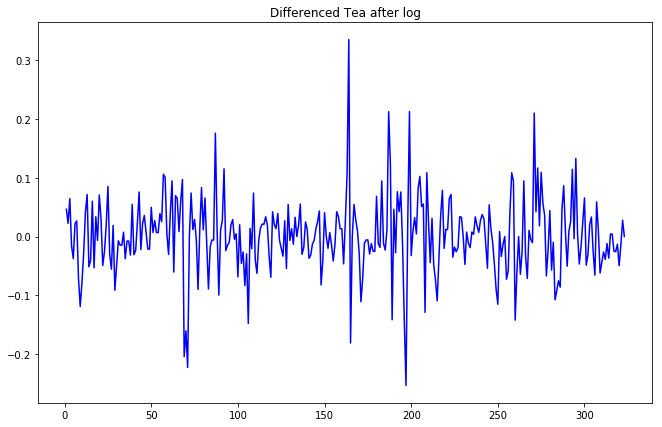

In [20]:
Tea_diff = Tea_data.diff(periods=1)

fig = plt.figure(figsize=(11,7))
plt.plot(Tea_diff, color='blue',label='Diff')
plt.title('Differenced Tea after log')
plt.show(block=False)

In [21]:
inputs['Tea_stationary'] = Tea_diff.values

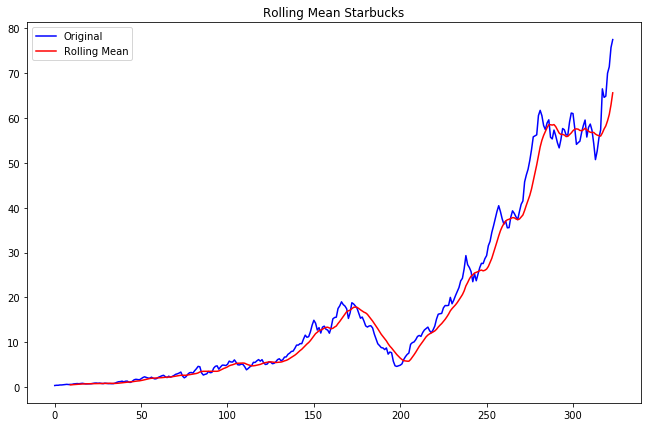

In [22]:
rolmean = inputs['Starbucks'].rolling(window = 10).mean()
fig = plt.figure(figsize=(11,7))
orig = plt.plot(inputs['Starbucks'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean Starbucks')
plt.show(block=False)

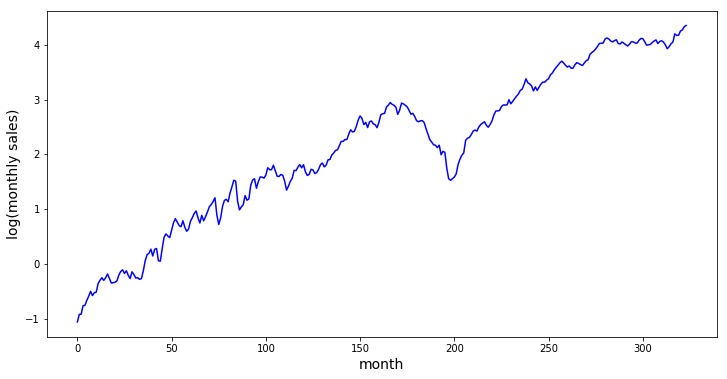

In [23]:
Star_data = pd.Series(np.log(inputs['Starbucks']))
fig = plt.figure(figsize=(12,6))
plt.plot(Star_data, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.show()

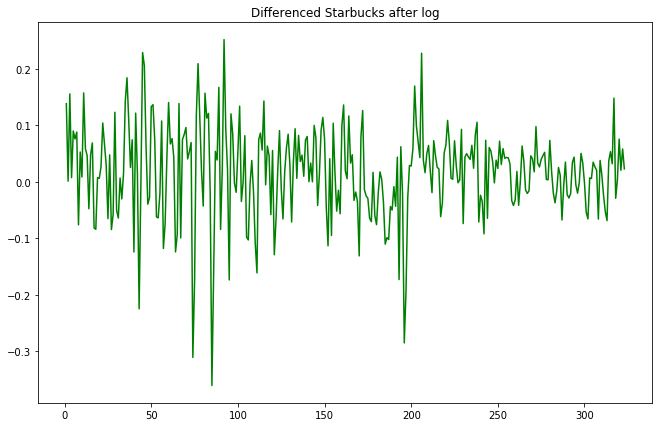

In [24]:
Star_diff = Star_data.diff(periods=1)

fig = plt.figure(figsize=(11,7))
plt.plot(Star_diff, color='green',label='Diff')
plt.title('Differenced Starbucks after log')
plt.show(block=False)

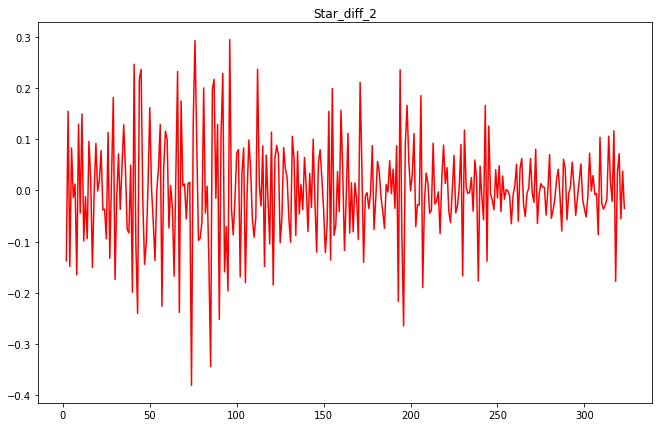

In [25]:
Star_diff_2 = Star_diff.diff(periods=1)

fig = plt.figure(figsize=(11,7))
plt.plot(Star_diff_2, color='red',label='Diff')
plt.title('Star_diff_2')
plt.show(block=False)

In [26]:
inputs['Starbucks_stationary'] = Star_diff_2.values

In [27]:
inputs = inputs.iloc[13:,]

In [28]:
inputs.head()

,Date,ICO composite indicator,Colombian Milds,Other Milds,Brazilian Naturals,Robustas,Target,Rainfall - (MM),Bond _Value,Tea_Price,Starbucks,ICO_stationary,rain_stationary,Bond_stationary,Tea_stationary,Starbucks_stationary
13,1993-07-01,60.61,76.40,71.81,65.76,49.40,14.996429,314.694,5.805238,72.1065,0.778553,4.6075,79.831,-0.157489,0.071692,-0.012102
14,1993-08-01,67.69,84.18,76.92,73.25,58.46,14.738636,220.016,5.677727,68.4785,0.742365,3.0025,-63.125,-0.127511,-0.051624,-0.094235
15,1993-09-01,71.64,86.58,80.77,75.58,62.50,14.742857,277.103,5.360000,65.7575,0.778832,-0.4150,43.729,-0.317727,-0.040546,0.095550
16,1993-10-01,67.78,83.02,76.64,71.65,58.92,15.040476,208.869,5.328476,69.8390,0.834450,-7.1700,36.243,-0.031524,0.060219,0.021023
17,1993-11-01,70.03,85.56,78.60,74.20,61.46,14.102381,287.299,5.697238,66.2110,0.769159,-0.1050,7.814,0.368762,-0.053346,-0.150451


In [29]:
inputs.columns

Index(['Date', 'ICO composite indicator', 'Colombian\r\n Milds', 'Other Milds',
       'Brazilian\r\n Naturals', 'Robustas', 'Target', 'Rainfall - (MM)',
       'Bond _Value', 'Tea_Price', 'Starbucks', 'ICO_stationary',
       'rain_stationary', 'Bond_stationary', 'Tea_stationary',
       'Starbucks_stationary'],
      dtype='object')

In [30]:
#Drop the columns which have multicollinearity with the ICO column and the original columns before stationary
inputs = inputs.drop(columns = ['Colombian\r\n Milds','Brazilian\r\n Naturals','Rainfall - (MM)','Bond _Value'], axis=1)
inputs  = inputs.drop(columns=['Tea_Price','Starbucks'],axis=1)
inputs = inputs.drop(columns=['ICO composite indicator','Other Milds','Robustas'],axis=1)

In [31]:
inputs.head()

,Date,Target,ICO_stationary,rain_stationary,Bond_stationary,Tea_stationary,Starbucks_stationary
13,1993-07-01,14.996429,4.6075,79.831,-0.157489,0.071692,-0.012102
14,1993-08-01,14.738636,3.0025,-63.125,-0.127511,-0.051624,-0.094235
15,1993-09-01,14.742857,-0.4150,43.729,-0.317727,-0.040546,0.095550
16,1993-10-01,15.040476,-7.1700,36.243,-0.031524,0.060219,0.021023
17,1993-11-01,14.102381,-0.1050,7.814,0.368762,-0.053346,-0.150451


In [ ]:
#savinf=g the new data frame as a csv file
inputs.to_csv(r'C:\Users\homer\Desktop\dataset_stationary.csv')